# <center>Lending Club Case Study

## 1. Introduction

This case study is about a lending Club. We analyse the data and detect a pattern to minimise the risk of losing money when lending to customers. 

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In this case study, we will use *Exploratory Data Analysis* to understand how consumer attributes and loan attributes influence the tendency of default. 
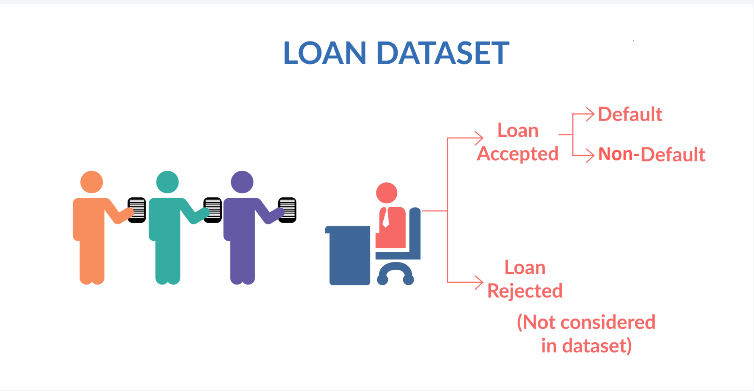

## 2. Business Objective

* To understand the driving factors behind loan default.
* Identification of risky loan applicants using EDA.

## 3. Initialize

### 3.1 Import Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Extra Libraries

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import folium

### 3.2 Change default settings

In [3]:
#Change pandas display setting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 4. Data Sourcing

### 4.1 Import Data

In [4]:
# The description of columns
description = pd.read_excel('Data/Data_Dictionary.xlsx', index_col=0, usecols=[0,1])

# The actual dataset
loandf = pd.read_csv('Data/loan.csv',  low_memory=False)


In [5]:
#Extra data
#Map Data of US
with open('Data/us_states_map.json') as f:
    geodata = json.load(f)

### 4.2 Explore Data

In [6]:
#check out data
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loandf.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

In [8]:
loandf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

### 4.3 Explore Meta-Data

In [9]:
description

Description
LoanStatNew                                                                                                                                                                                                                                       
acc_now_delinq                                                                                                                                                                     The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths                                                                                                                                                                                    Number of trades opened in past 24 months.
addr_state                                                                                                                                                                              The state provided by the borrower in the loan application
all_util                                                                                                                                                                                                     Balance to credit limit on all trades
annual_inc                                                                                                                                                           The self-reported annual income provided by the borrower during registration.
annual_inc_joint                                                                                                                                         The combined self-reported annual income provided by the co-borrowers during registration
application_type                                                                                                                              Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal                                                                                                                                                                                                Average current balance of all accounts
bc_open_to_buy                                                                                                                                                                                           Total open to buy on revolving bankcards.
bc_util                                                                                                                                                      Ratio of total current balance to high credit/credit limit for all bankcard accounts.
chargeoff_within_12_mths                                                                                                                                                                                    Number of charge-offs within 12 months
collection_recovery_fee                                                                                                                                                                                             post charge off collection fee
collections_12_mths_ex_med                                                                                                                                                        Number of collections in 12 months excluding medical collections
delinq_2yrs                                                                                                                           The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
delinq_amnt                                                                                                                                                     The past-due amount owed for the accounts on which the borrower is now delinquent.
desc                                                                                                

## 5. Data Cleaning

### 5.1 Fix Rows and Columns


**Rows**

Remove empty rows.

In [10]:
#Check for all empty rows
loandf[loandf.isnull().sum(axis=1)==len(loandf.columns)]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

No Rows are empty. 

**Columns**

Remove empty columns

In [11]:
# Check columns having no values
columns_to_drop = loandf.columns[loandf.isnull().sum()==len(loandf)].to_list()
print(f'Dropped Columns :{columns_to_drop}')
#Drop the empty columns
loandf.drop(columns=columns_to_drop, inplace=True)

Dropped Columns :['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'tota

We check for column having only one value.

In [12]:
cols = loandf.columns[loandf.nunique()==1]
description.loc[cols]

Description
LoanStatNew                                                                                                                     
pymnt_plan                                                        Indicates if a payment plan has been put in place for the loan
initial_list_status                                           The initial listing status of the loan. Possible values are – W, F
collections_12_mths_ex_med                                      Number of collections in 12 months excluding medical collections
policy_code                                  publicly available policy_code=1\nnew products not publicly available policy_code=2
application_type            Indicates whether the loan is an individual application or a joint application with two co-borrowers
acc_now_delinq                                                   The number of accounts on which the borrower is now delinquent.
chargeoff_within_12_mths                                                                  Number of charge-offs within 12 months
delinq_amnt                                   The past-due amount owed for the accounts on which the borrower is now delinquent.
tax_liens                                                                                                    Number of tax liens

We remove these as well.

In [13]:
loandf.drop(columns=cols, inplace=True)

We check for other potential columns to be removed.

In [14]:
# Create a temporory dataframe to see the description, typical value and 
# missing value count to see which columns can be dropped.
temp_df = loandf.isnull().sum()
temp_df = pd.DataFrame(temp_df, columns=['Null Rows'])
temp_df['description'] = description.loc[temp_df.index]
temp_df['typical value'] = loandf.iloc[0]
temp_df['datatype'] = loandf.dtypes
temp_df

Null Rows  \
id                               0   
member_id                        0   
loan_amnt                        0   
funded_amnt                      0   
funded_amnt_inv                  0   
term                             0   
int_rate                         0   
installment                      0   
grade                            0   
sub_grade                        0   
emp_title                     2459   
emp_length                    1075   
home_ownership                   0   
annual_inc                       0   
verification_status              0   
issue_d                          0   
loan_status                      0   
url                              0   
desc                         12940   
purpose                          0   
title                           11   
zip_code                         0   
addr_state                       0   
dti                              0   
delinq_2yrs                      0   
earliest_cr_line                 0   
inq_last_6mths                   0   
mths_since_last_delinq       25682   
mths_since_last_record       36931   
open_acc                         0   
pub_rec                          0   
revol_bal                        0   
revol_util                      50   
total_acc                        0   
out_prncp                        0   
out_prncp_inv                    0   
total_pymnt                      0   
total_pymnt_inv                  0   
total_rec_prncp                  0   
total_rec_int                    0   
total_rec_late_fee               0   
recoveries                       0   
collection_recovery_fee          0   
last_pymnt_d                    71   
last_pymnt_amnt                  0   
next_pymnt_d                 38577   
last_credit_pull_d               2   
pub_rec_bankruptcies           697   

                                                                                                                                                                                                                      description  \
id                                                                                                                                                                                  A unique LC assigned ID for the loan listing.   
member_id                                                                                                                                                                        A unique LC assigned Id for the borrower member.   
loan_amnt                                            The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.   
funded_amnt                                                                                                                                                        The total amount committed to that loan at that point in time.   
funded_amnt_inv                                                                                                                                      The total amount committed by investors for that loan at that point in time.   
term                                                                                                                                         The number of payments on the loan. Values are in months and can be either 36 or 60.   
int_rate                                                                                                                                                                                                Interest Rate on the loan   
installment                                                                                                                                                      The monthly payment owed by the borrower if the loan originates.   
grade                                                                                                

In [15]:
drop_columns = ['url', 'zip_code','earliest_cr_line','total_pymnt', 'total_pymnt_inv', 'out_prncp',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','out_prncp_inv',
                'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d', 'title']
loandf.drop(columns=drop_columns, inplace=True)

In [16]:
loandf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc  last_pymnt_amnt  pub_rec_bankruptcies  
count  39717.000000     39717.000000          39020.000000  
mean      22.088828      2678.826162              0.043260  
std       11.401709      4447.136012              0.204324  
min        2.000000         0.000000              0.000000  
25%       13.000000       218.680000              0.000000  
50%       20.000000       546.140000              0.000000  
75%       29.000000      3293.160000              0.000000  
max       90.000000     36115.200000              2.000000

Based on the distribution, we further remove these columns.

In [17]:
drop_columns = ['delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'last_pymnt_amnt','pub_rec_bankruptcies']
loandf.drop(columns=drop_columns, inplace=True)

<font color="green"> *Rows and Columns are fixed.* </font>

### 5.2 Missing Values


Remove rows having significant number of null values.

In [18]:
# List all rows having missing values more than 50%
drop_rows_index = loandf.index[loandf.isnull().sum(axis=1)>=0.5*len(loandf.loc[0])]
len(drop_rows_index)

0

No Rows have more than 50% cells missing. So we don't remove any rows.

Remove column having significant number of null values.

In [19]:
# Check for more columns to be removed.
null_count = loandf.isnull().sum()
null_count[null_count!=0]

emp_title                  2459
emp_length                 1075
desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
revol_util                   50
next_pymnt_d              38577
dtype: int64

Text(0.5, 1.0, 'Distribution of missing values')

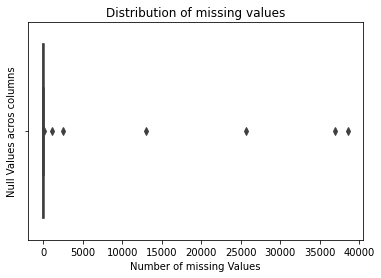

In [20]:
#Checking as a graph
sns.boxplot(x=loandf.isnull().sum())
plt.ylabel('Null Values acros columns')
plt.xlabel('Number of missing Values')
plt.title('Distribution of missing values')

In [21]:
# List all columns having missing values more than 5000
drop_columns = loandf.columns[loandf.isnull().sum()>=5000].to_list()
description.loc[drop_columns]

Description
LoanStatNew                                                                        
desc                                      Loan description provided by the borrower
mths_since_last_delinq  The number of months since the borrower's last delinquency.
mths_since_last_record           The number of months since the last public record.
next_pymnt_d                                            Next scheduled payment date

We can see that most remaining columns have no missing values. And the columns with more than 5000 missing values  'mths_since_last_delinq', 'mths_since_last_record', and 'next_pymnt_d' are not relevant for our target variable Hence we remove them as well. We retain desc as it may be usefull.

In [22]:
loandf.drop(columns=drop_columns, inplace=True)

In [23]:
#object_cols = [ col  for col, dt in loandf.dtypes.items() if dt == object]
#loandf[object_cols].head()

In [24]:
# Check for remaining columns.
null_count = loandf.isnull().sum()
null_count[null_count!=0]

emp_title     2459
emp_length    1075
revol_util      50
dtype: int64

We create a function to get info of columns, So that we fill the missing values.

In [25]:
def displayinfo(columnval):
    """Displays the info of each column."""
    print(f'Number of null cells : {columnval.isnull().sum()}')
    print(f'Number of unique values : {columnval.nunique()}')
    print('Value Counts:')
    no = min(15, columnval.nunique())
    print(columnval.value_counts()[0:no])

In [26]:
displayinfo(loandf.emp_title )

Number of null cells : 2459
Number of unique values : 28820
Value Counts:
US Army                    134
Bank of America            109
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
USAF                        54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   41
Verizon Wireless            40
Name: emp_title, dtype: int64


Since these are company names, we will change the missing values to 'Unknown'.

In [27]:
loandf.emp_title.fillna('Unknown', inplace=True)

In [28]:
displayinfo(loandf.emp_length )

Number of null cells : 1075
Number of unique values : 11
Value Counts:
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


We will assume these as < 1 year experience.

In [29]:
loandf.emp_length.fillna('< 1 year', inplace=True)

In [30]:
displayinfo(loandf.home_ownership)

Number of null cells : 0
Number of unique values : 5
Value Counts:
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [31]:
loandf.home_ownership = loandf.home_ownership.str.replace('NONE', 'OTHER')

In [32]:
displayinfo(loandf.verification_status)

Number of null cells : 0
Number of unique values : 3
Value Counts:
Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64


In [33]:
displayinfo(loandf.loan_status)

Number of null cells : 0
Number of unique values : 3
Value Counts:
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [34]:
displayinfo(loandf.purpose)

Number of null cells : 0
Number of unique values : 14
Value Counts:
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64


In [35]:
displayinfo(loandf.addr_state)

Number of null cells : 0
Number of unique values : 50
Value Counts:
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
Name: addr_state, dtype: int64


In [36]:
displayinfo(loandf.grade)

Number of null cells : 0
Number of unique values : 7
Value Counts:
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


In [37]:
displayinfo(loandf.sub_grade)       

Number of null cells : 0
Number of unique values : 35
Value Counts:
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
Name: sub_grade, dtype: int64


In [38]:
displayinfo(loandf.revol_util) 

Number of null cells : 50
Number of unique values : 1089
Value Counts:
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
0.10%      58
31.20%     57
61%        57
46.40%     57
66.60%     57
65.90%     56
70.40%     56
57.40%     55
49.80%     55
48.90%     55
Name: revol_util, dtype: int64


In [39]:
# We check for revol_util for revol_bal is 0. 
loandf[['revol_bal', 'revol_util']][loandf.revol_util.isnull()]

revol_bal revol_util
3565           0        NaN
4714           0        NaN
4943           0        NaN
11282          0        NaN
12042          0        NaN
12147          0        NaN
13891          0        NaN
17985          0        NaN
18184          0        NaN
21604          0        NaN
24663          0        NaN
24738          0        NaN
24984          0        NaN
25261          0        NaN
25977          0        NaN
26649          0        NaN
26724          0        NaN
26813          0        NaN
28170          0        NaN
28685          0        NaN
28938          0        NaN
28986          0        NaN
29236          0        NaN
29248          0        NaN
31862          0        NaN
31939          0        NaN
32715          0        NaN
33078          0        NaN
33490          0        NaN
33534          0        NaN
34268          0        NaN
34849          0        NaN
35851          0        NaN
36209          0        NaN
36473          0        NaN
36859          0        NaN
37042          0        NaN
37268          0        NaN
37540      49238        NaN
37709          0        NaN
37757          0        NaN
37778          0        NaN
37911          0        NaN
38201          0        NaN
38457          0        NaN
38524          0        NaN
38899          0        NaN
38917          0        NaN
38949          0        NaN
38970          0        NaN

In [40]:
#We will fill with 0% as 
loandf.revol_util.fillna('0%', inplace=True)

In [41]:
#Verify there are no missing values
loandf.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
dtype: int64

<font color="green"> *All missing values are fixed.* </font>

### 5.3 Fix Invalid Values

In [42]:
#Remove % from rate
loandf.int_rate = loandf.int_rate.str.rstrip('%').astype(float)

#Remove % from revol_util
loandf.revol_util = loandf.revol_util.str.rstrip('%').astype(float)

#Convert to date
loandf.issue_d = pd.to_datetime(loandf.issue_d, format='%b-%y')

### 5.4 Standardize Numerical Data

Remove outliers

In [43]:
loandf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    annual_inc  \
count     39717.000000  39717.000000  39717.000000  3.971700e+04   
mean      10397.448868     12.021177    324.561922  6.896893e+04   
std        7128.450439      3.724825    208.874874  6.379377e+04   
min           0.000000      5.420000     15.690000  4.000000e+03   
25%        5000.000000      9.250000    167.020000  4.040400e+04   
50%        8975.000000     11.860000    280.220000  5.900000e+04   
75%       14400.000000     14.590000    430.780000  8.230000e+04   
max       35000.000000     24.590000   1305.190000  6.000000e+06   

                dti      open_acc      revol_bal    revol_util     total_acc  
count  39717.000000  39717.000000   39717.000000  39717.000000  39717.000000  
mean      13.315130      9.294408   13382.528086     48.770677     22.088828  
std        6.678594      4.400282   15885.016641     28.367689     11.401709  
min        0.000000      2.000000       0.000000      0.000000      2.000000  
25%        8.170000      6.000000    3703.000000     25.300000     13.000000  
50%       13.400000      9.000000    8850.000000     49.200000     20.000000  
75%       18.600000     12.000000   17058.000000     72.300000     29.000000  
max       29.990000     44.000000  149588.000000     99.900000     90.000000

In [44]:
def plot_box_all(loandf):
    fig, axs = plt.subplots(2,3, figsize=(16,10))
    axs = axs.flatten()
    loandf.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], ax=axs[0])
    axs[0].set_ylabel('Counts')
    loandf.boxplot(column=['open_acc', 'total_acc'], ax=axs[1])
    axs[1].set_ylabel('Counts')
    loandf.boxplot(column=['dti'] , ax=axs[2])
    axs[2].set_ylabel('Counts')
    loandf.boxplot(column=['int_rate','revol_util'], ax=axs[3])
    axs[3].set_ylabel('Counts')
    loandf.boxplot(column=['revol_bal'], ax=axs[4])
    axs[4].set_ylabel('Counts')
    loandf.boxplot(column=['installment', 'annual_inc', 'loan_amnt'], ax=axs[5])
    axs[5].set_yscale('log')
    axs[5].set_ylabel('Counts')
    _=plt.suptitle('Distribution of Continuous Variables.')

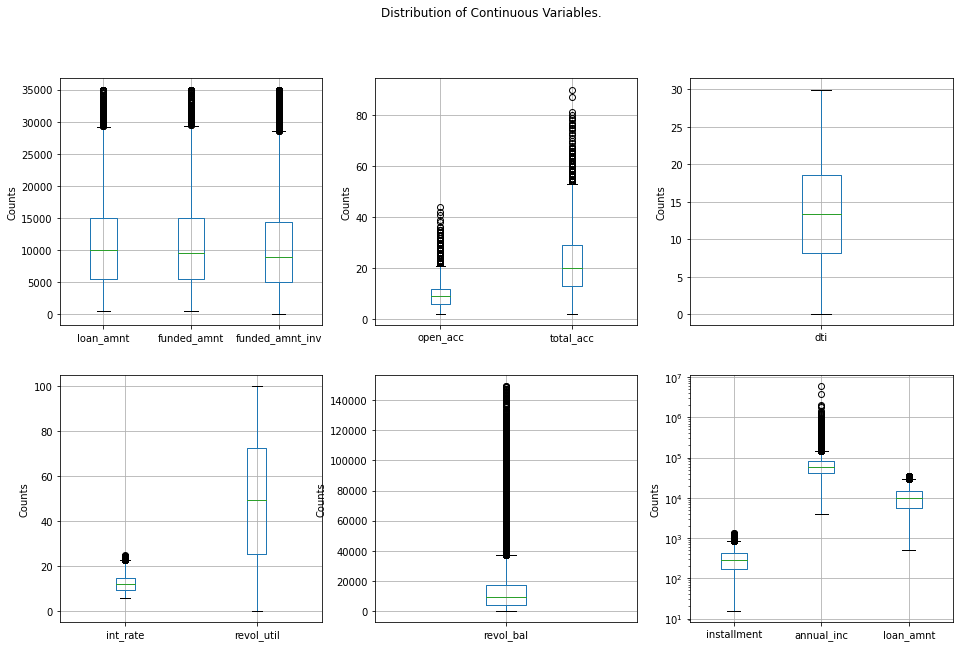

In [45]:
plot_box_all(loandf)


<font color="green">*Observations*</font>
* columns *loan_amnt, funded_amnt, and funded_amnt_inv* have outliers and they have to be removed.
* columns *open_acc and total_acc* have outliers and they have to be removed.
* columns *int_rate, revol_bal, and installment* have outliers and they have to be removed.
* <font color="green"> Columns *dti and revol_util* does not have any outlier.</font>

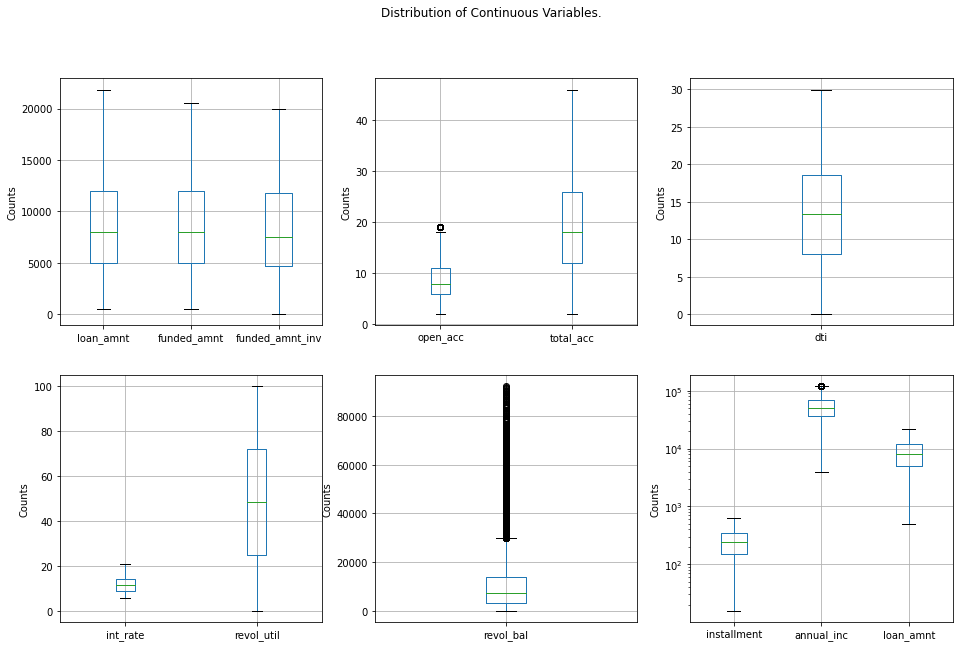

In [46]:
loandf2 = loandf.copy()
loandf2 = loandf2[loandf2['loan_amnt'] < loandf2['loan_amnt'].quantile(0.90)]
loandf2 = loandf2[loandf2['funded_amnt'] < loandf2['funded_amnt'].quantile(0.990)]
loandf2 = loandf2[loandf2['funded_amnt_inv'] < loandf2['funded_amnt_inv'].quantile(0.990)]
loandf2 = loandf2[loandf2['open_acc'] < loandf2['open_acc'].quantile(0.98)]
loandf2 = loandf2[loandf2['total_acc'] < loandf2['total_acc'].quantile(0.98)]
loandf2 = loandf2[loandf2['int_rate'] < loandf2['int_rate'].quantile(0.995)]
loandf2 = loandf2[loandf2['revol_bal'] < loandf2['revol_bal'].quantile(0.995)]
loandf2 = loandf2[loandf2['installment'] < loandf2['installment'].quantile(0.98)]
loandf2 = loandf2[loandf2['annual_inc'] < loandf2['annual_inc'].quantile(0.95)]

plot_box_all(loandf2)
loandf = loandf2.copy()

<font color="green">*Observations*</font>
* 0.5% to 10% of total values were removed from each column.
* All columns except revol_bal has no outliers now.
* We will leave the dataset as is now. The column revol_bal can be further filtered if needed later.


In [47]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30619 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   30619 non-null  int64         
 1   member_id            30619 non-null  int64         
 2   loan_amnt            30619 non-null  int64         
 3   funded_amnt          30619 non-null  int64         
 4   funded_amnt_inv      30619 non-null  float64       
 5   term                 30619 non-null  object        
 6   int_rate             30619 non-null  float64       
 7   installment          30619 non-null  float64       
 8   grade                30619 non-null  object        
 9   sub_grade            30619 non-null  object        
 10  emp_title            30619 non-null  object        
 11  emp_length           30619 non-null  object        
 12  home_ownership       30619 non-null  object        
 13  annual_inc           30619 non-

### 5.5 Standardize Text Data

We standarize the values of all text columns.

In [48]:
text_columns=loandf.columns[loandf.dtypes==object]
loandf[text_columns].head(10)

term grade sub_grade                  emp_title emp_length  \
0    36 months     B        B2                    Unknown  10+ years   
1    60 months     C        C4                      Ryder   < 1 year   
2    36 months     C        C5                    Unknown  10+ years   
3    36 months     C        C1        AIR RESOURCES BOARD  10+ years   
4    60 months     B        B5   University Medical Group     1 year   
5    36 months     A        A4       Veolia Transportaton    3 years   
6    60 months     C        C5  Southern Star Photography    8 years   
7    36 months     E        E1            MKC Accounting     9 years   
9    60 months     B        B5                  Starbucks   < 1 year   
10   60 months     C        C3      Southwest Rural metro    5 years   

   home_ownership verification_status  loan_status             purpose  \
0            RENT            Verified   Fully Paid         credit_card   
1            RENT     Source Verified  Charged Off                 car   
2            RENT        Not Verified   Fully Paid      small_business   
3            RENT     Source Verified   Fully Paid               other   
4            RENT     Source Verified      Current               other   
5            RENT     Source Verified   Fully Paid             wedding   
6            RENT        Not Verified   Fully Paid  debt_consolidation   
7            RENT     Source Verified   Fully Paid                 car   
9            RENT            Verified  Charged Off               other   
10            OWN        Not Verified   Fully Paid  debt_consolidation   

   addr_state  
0          AZ  
1          GA  
2          IL  
3          CA  
4          OR  
5          AZ  
6          NC  
7          CA  
9          TX  
10         AZ

In [49]:
loandf.purpose.value_counts()

debt_consolidation    13925
credit_card            3948
other                  3386
home_improvement       2073
major_purchase         1857
car                    1380
small_business         1225
wedding                 781
medical                 569
moving                  503
vacation                341
educational             288
house                   264
renewable_energy         79
Name: purpose, dtype: int64

In [50]:
loandf.purpose = loandf.purpose.str.title()

### 5.6 Filter Data

We remove rows with loan_status as current as they are not relevant to our analysis.

In [51]:
loandf = loandf[loandf['loan_status']!='Current']
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   29927 non-null  int64         
 1   member_id            29927 non-null  int64         
 2   loan_amnt            29927 non-null  int64         
 3   funded_amnt          29927 non-null  int64         
 4   funded_amnt_inv      29927 non-null  float64       
 5   term                 29927 non-null  object        
 6   int_rate             29927 non-null  float64       
 7   installment          29927 non-null  float64       
 8   grade                29927 non-null  object        
 9   sub_grade            29927 non-null  object        
 10  emp_title            29927 non-null  object        
 11  emp_length           29927 non-null  object        
 12  home_ownership       29927 non-null  object        
 13  annual_inc           29927 non-

### 5.7 Derived metrics

We can add month and year columns from date.

In [52]:
loandf['issue_month'] = loandf.issue_d.dt.month
loandf['issue_year'] = loandf.issue_d.dt.year

We can add new column by converting emp_length to number

In [53]:
def format_period(x):
    "Function to change emp_length to int."""
    if isinstance(x, str) == False:
        return None
    if x == '10+ years':
        return int(10)
    elif x == '< 1 year':
        return int(0)
    elif x == '1 year':
        return int(1)
    else:
        return int(x.replace('years',''))

In [54]:
loandf['emp_length_i'] = loandf.emp_length.apply(format_period)
loandf.emp_length_i.describe()

count    29927.000000
mean         4.563705
std          3.534926
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: emp_length_i, dtype: float64

## 6 Data Analysis

### 6.1 Univariate analysis

We analyse each variable before going for bivariate analysis.

**Continuous Variables**

In [55]:
loandf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  2.992700e+04  2.992700e+04  29927.000000  29927.000000   
mean   6.703320e+05  8.346387e+05   8625.071841   8486.405253   
std    2.089738e+05  2.649280e+05   4694.661911   4567.479250   
min    5.574200e+04  7.472400e+04    500.000000    500.000000   
25%    5.078635e+05  6.544005e+05   5000.000000   5000.000000   
50%    6.475370e+05  8.281050e+05   8000.000000   8000.000000   
75%    8.202390e+05  1.027882e+06  12000.000000  12000.000000   
max    1.077501e+06  1.314167e+06  21850.000000  20500.000000   

       funded_amnt_inv      int_rate   installment     annual_inc  \
count     29927.000000  29927.000000  29927.000000   29927.000000   
mean       8070.665555     11.492987    256.599361   55146.696191   
std        4591.745366      3.451436    136.139242   23911.021935   
min           0.000000      5.420000     15.690000    4000.000000   
25%        4525.000000      8.490000    152.205000   37000.000000   
50%        7397.313703     11.490000    237.920000   51000.000000   
75%       11475.000000     13.980000    345.880000   70000.000000   
max       19999.021440     20.890000    634.350000  121000.000000   

                dti      open_acc     revol_bal    revol_util     total_acc  \
count  29927.000000  29927.000000  29927.000000  29927.000000  29927.000000   
mean      13.245811      8.536739  10271.536940     48.200616     19.614662   
std        6.709369      3.705290  10814.727376     28.418580      9.457224   
min        0.000000      2.000000      0.000000      0.000000      2.000000   
25%        8.030000      6.000000   3123.000000     24.600000     12.000000   
50%       13.350000      8.000000   7344.000000     48.400000     18.000000   
75%       18.580000     11.000000  13717.500000     71.700000     26.000000   
max       29.990000     19.000000  92399.000000     99.900000     46.000000   

        issue_month    issue_year  emp_length_i  
count  29927.000000  29927.000000  29927.000000  
mean       7.066328   2010.285795      4.563705  
std        3.411111      0.890679      3.534926  
min        1.000000   2007.000000      0.000000  
25%        4.000000   2010.000000      2.000000  
50%        7.000000   2011.000000      4.000000  
75%       10.000000   2011.000000      8.000000  
max       12.000000   2011.000000     10.000000

In [56]:
def myhistplot(ax, df, x, xlabel=None, title=None):
    sns.histplot(data=df, x=x, kde=True, ax=ax)
    #ax_box.set(xlabel='')
    ax.set_title(title)
    ax.set_xlabel(xlabel)

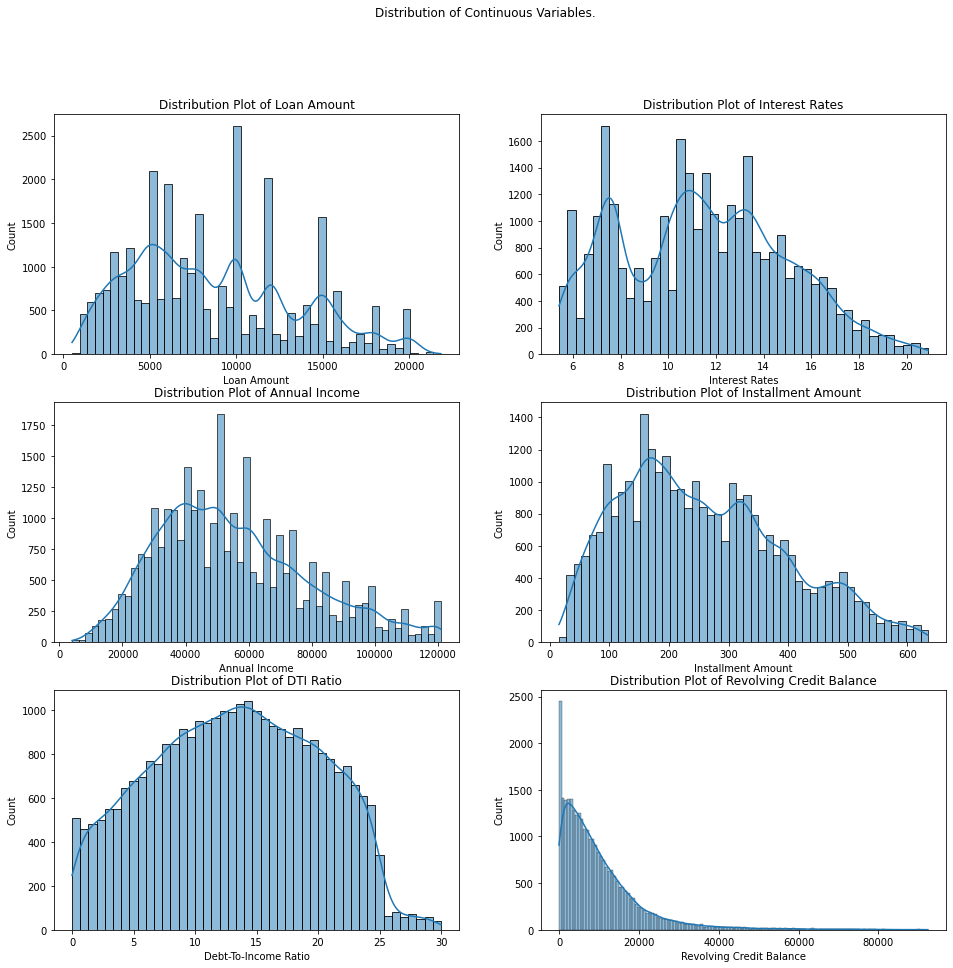

In [57]:
f, axs = plt.subplots(3,2, figsize=(16,15))
axs = axs.flatten()

myhistplot(axs[0], loandf, x='loan_amnt', xlabel='Loan Amount', title='Distribution Plot of Loan Amount')
myhistplot(axs[1], loandf, x='int_rate', xlabel='Interest Rates', title='Distribution Plot of Interest Rates')
myhistplot(axs[2], loandf, x='annual_inc', xlabel='Annual Income', title='Distribution Plot of Annual Income')
myhistplot(axs[3], loandf, x='installment', xlabel='Installment Amount', title='Distribution Plot of Installment Amount')
myhistplot(axs[4], loandf, x='dti', xlabel='Debt-To-Income Ratio', title='Distribution Plot of DTI Ratio')
myhistplot(axs[5], loandf, x='revol_bal', xlabel='Revolving Credit Balance', title='Distribution Plot of Revolving Credit Balance')
_=plt.suptitle('Distribution of Continuous Variables.')



<font color="green">**Insights**</font>
1. Loan amount is distributed normally to a large extent. The most common amount is 10000.
2. Common interst rate offered are from 6-8% and 10-15%.
3. Annual income is normally distributedd with a spike at around 50000.
4. Instalment amount is skewed towards 150 region.
5. The number of people with extremely hight debt to income ratio is very low.
6. Most people don't use revolving credit.

**Categorical Variables**

In [58]:
def mycountplot(ax, df, x, xlabel=None, title=None):
    sns.countplot(data=df, x=x, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

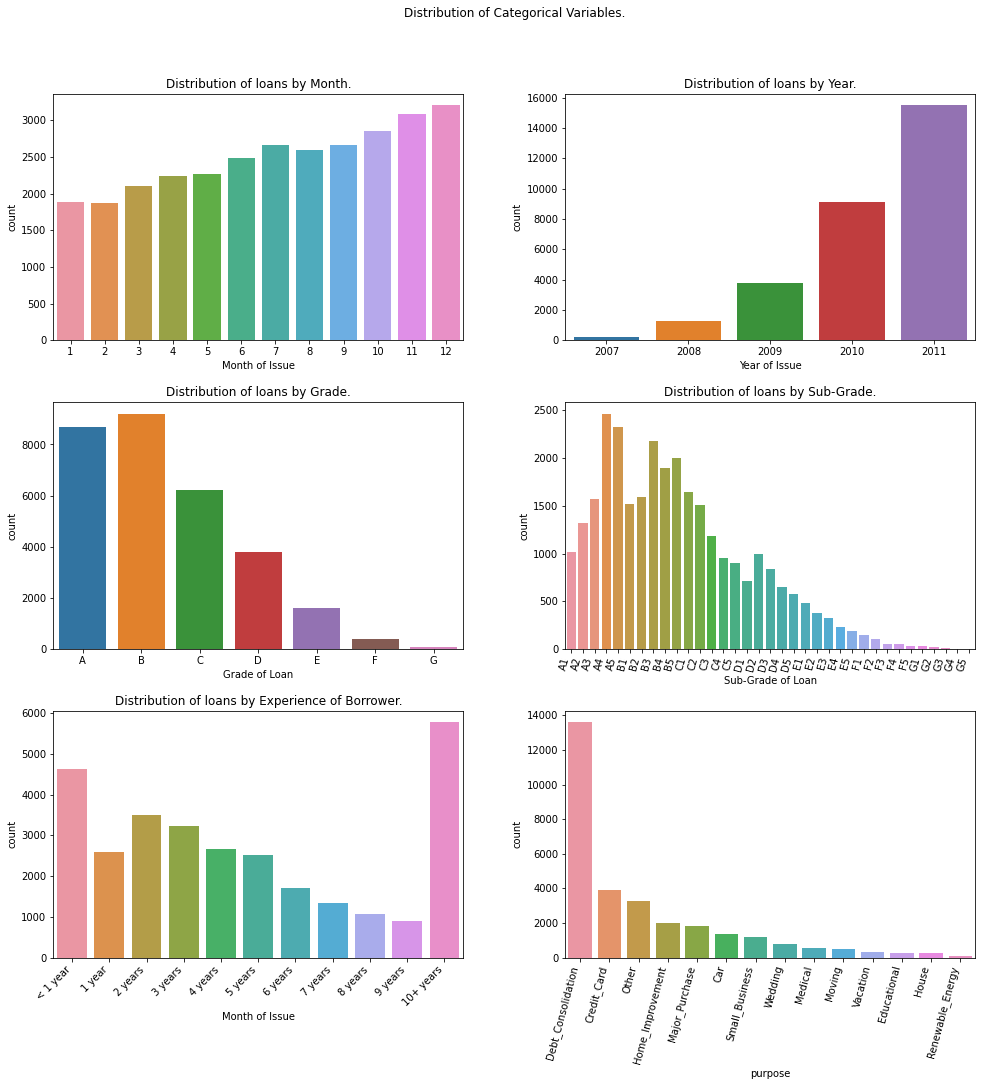

In [59]:
fig, axs = plt.subplots(3,2, figsize=(16,15))
axs = axs.flatten()
mycountplot(axs[0], loandf, x='issue_month', xlabel='Month of Issue', title='Distribution of loans by Month.')
mycountplot(axs[1], loandf, x='issue_year', xlabel='Year of Issue', title='Distribution of loans by Year.')

mycountplot(axs[2], loandf.sort_values(by='grade'), x='grade', xlabel='Grade of Loan', title='Distribution of loans by Grade.')
mycountplot(axs[3], loandf.sort_values(by='sub_grade'), x='sub_grade', xlabel='Sub-Grade of Loan', title='Distribution of loans by Sub-Grade.')
_=axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=75, ha='right')

mycountplot(axs[4], loandf.sort_values(by='emp_length_i'), x='emp_length', xlabel='Month of Issue', title='Distribution of loans by Experience of Borrower.')
axs[4].set_xticklabels(axs[4].get_xticklabels(), rotation=45, ha='right')                                  
sns.countplot(x='purpose',data=loandf, order=loandf['purpose'].value_counts().index, ax=axs[5])
_=axs[5].set_xticklabels(axs[5].get_xticklabels(), rotation=75, ha='right')

plt.suptitle('Distribution of Categorical Variables.')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.25, wspace=0.25)


<font color="green">**Insights**</font>
1. More loans taken towards the end of a year. The trend is clearly visible.
2. The number of loans taken increase every year from 2007-2011. This maybe due to the expansion of business.
3. Most of the issued loans are graded A, B or C.
4. Most of the issued loans are graded A4, A5, B3 or B5.
5. Most loans are issued to people with more than 10 years or less than 1year experiennce.
6. The most common reason for loan is Debt Consolidation. The second common reason is credit card. It seems to follow a power-law distribution.

### 6.2 Segmented Univariate Analysis

In [60]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   29927 non-null  int64         
 1   member_id            29927 non-null  int64         
 2   loan_amnt            29927 non-null  int64         
 3   funded_amnt          29927 non-null  int64         
 4   funded_amnt_inv      29927 non-null  float64       
 5   term                 29927 non-null  object        
 6   int_rate             29927 non-null  float64       
 7   installment          29927 non-null  float64       
 8   grade                29927 non-null  object        
 9   sub_grade            29927 non-null  object        
 10  emp_title            29927 non-null  object        
 11  emp_length           29927 non-null  object        
 12  home_ownership       29927 non-null  object        
 13  annual_inc           29927 non-

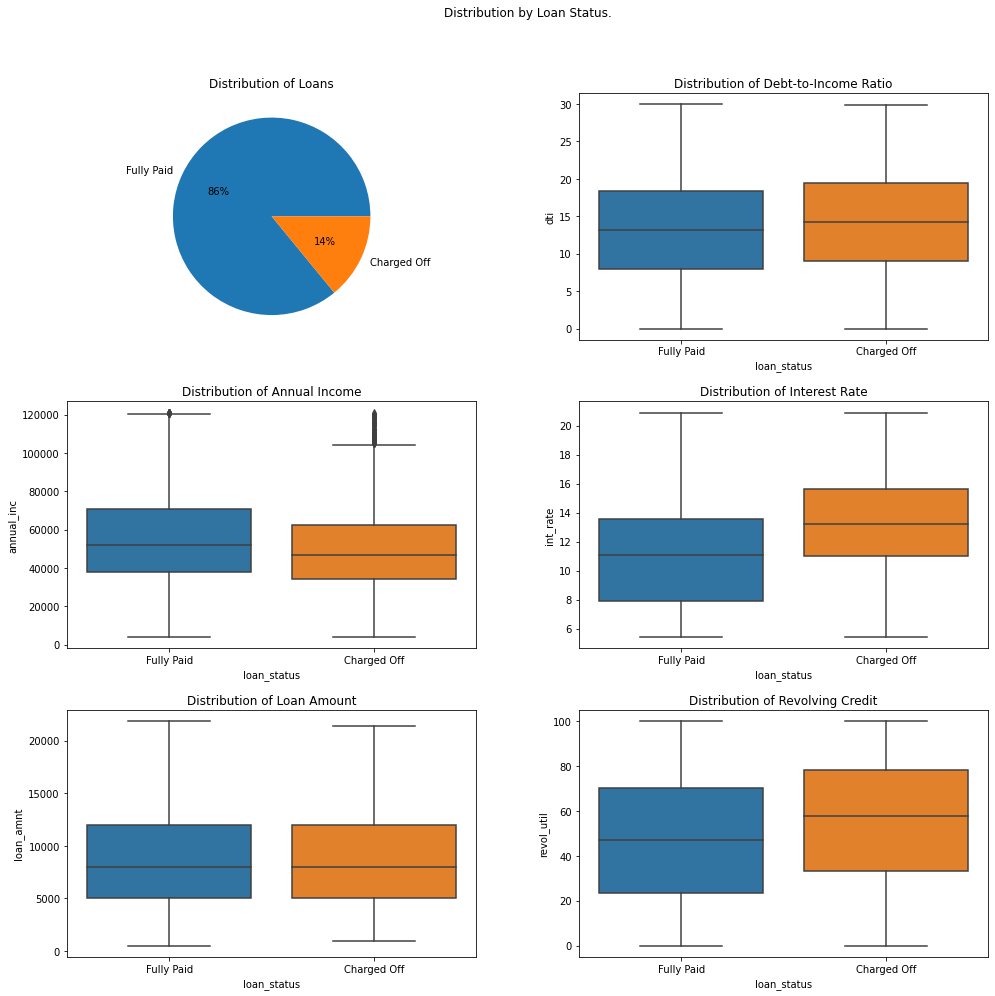

In [61]:
fig, axs = plt.subplots(3,2, figsize=(16,15))
axs= axs.flatten()
data=loandf.loan_status.value_counts()
axs[0].pie(data, labels = data.index, autopct='%.0f%%')
axs[0].set_title('Distribution of Loans')
#mycountplot(axs[0], loandf, 'loan_status', xlabel='Loan Status', title='Distribution of Loan status')
sns.boxplot(data=loandf, x='loan_status', y='dti', ax=axs[1])
axs[1].set_title('Distribution of Debt-to-Income Ratio')
sns.boxplot(data=loandf, x='loan_status', y='annual_inc', ax=axs[2])
axs[2].set_title('Distribution of Annual Income')
sns.boxplot(data=loandf, x='loan_status', y='int_rate', ax=axs[3])
axs[3].set_title('Distribution of Interest Rate')
sns.boxplot(data=loandf, x='loan_status', y='loan_amnt', ax=axs[4])
axs[4].set_title('Distribution of Loan Amount')
sns.boxplot(data=loandf, x='loan_status', y='revol_util', ax=axs[5])
axs[5].set_title('Distribution of Revolving Credit')
_=plt.suptitle('Distribution by Loan Status.')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.25, wspace=0.25)

<font color="green">**Insights**</font>
1. 14% of Loans are defaulted.
2. People who have higher debt to Income Ratio tend to default.
3. People who have higher annual income tend to pay back the loan fully.
4. People who are charged higher rate tend to default.
5. Loan amount doesn't have any impact on default.
6. People who utilize higher revolving credit tend to default.

In [62]:
def mybarplot(ax, df, col, xlabel=None, title=None, sortfunc=None):
    f = np.vectorize(format_period)
    ct = pd.crosstab(df[col], df['loan_status'])
    ct = ct.reindex(['Fully Paid', 'Charged Off'], axis=1)
    ct.index = ct.index.astype('str')
    if sortfunc:
        ct = ct.sort_index(key=sortfunc)

    ct.plot(kind='bar', stacked=True, ax=ax)
    ct['Percentage-ChargedOff']=ct.apply(lambda row: row['Charged Off']/row.sum() *100, axis=1)
    ax2 = ct['Percentage-ChargedOff'].plot(ax=ax, secondary_y=True , rot=60, color='r', marker='*')
    if xlabel:
        ax.set_xlabel(xlabel)
    if title:
        ax.set_title(title)
    ax.set_ylabel('Count')
    ax2.set_ylabel('Charged-Off Loans (%)')
    return ct

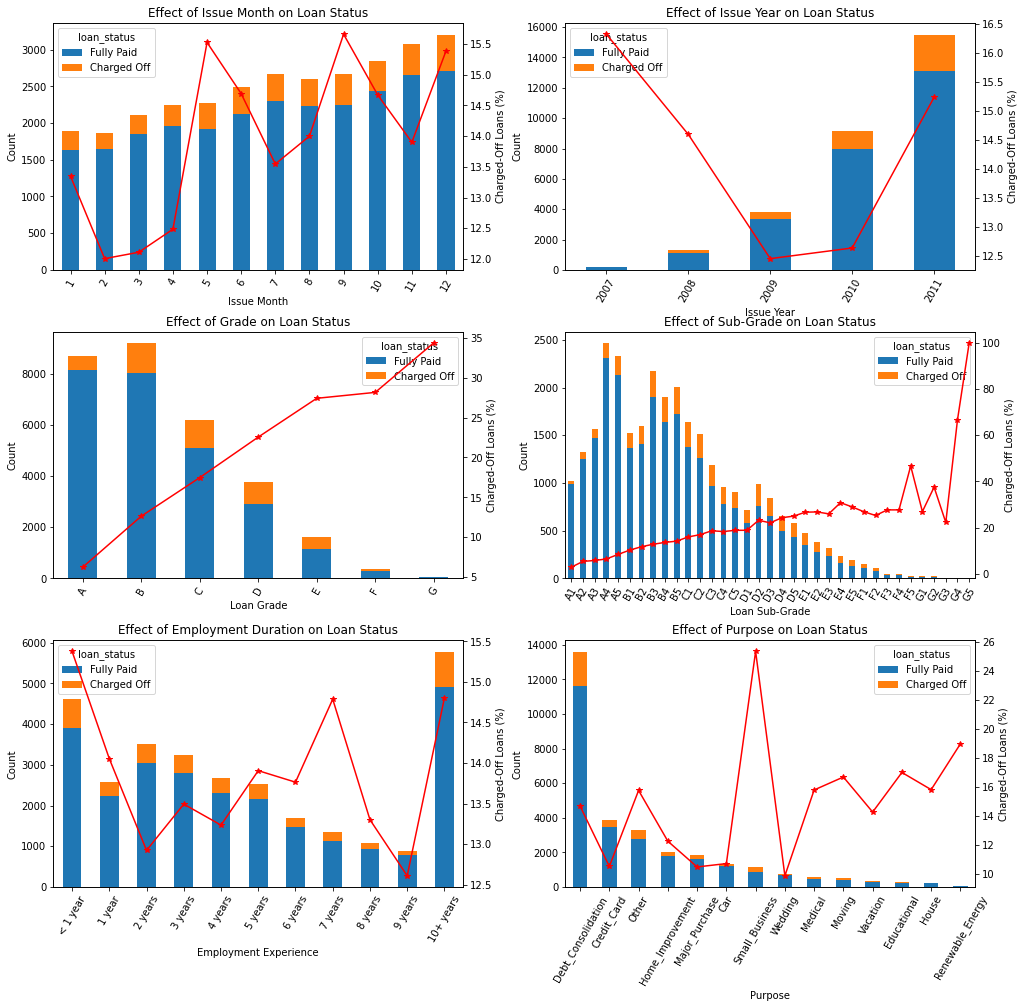

In [63]:
f = np.vectorize(format_period)
fig, axs = plt.subplots(3,2, figsize=(16,15))
axs= axs.flatten()
mybarplot(axs[0], loandf, col='issue_month',xlabel='Issue Month', title='Effect of Issue Month on Loan Status')
mybarplot(axs[1], loandf, col='issue_year',xlabel='Issue Year', title='Effect of Issue Year on Loan Status')
mybarplot(axs[2], loandf, col='grade',xlabel='Loan Grade', title='Effect of Grade on Loan Status')
mybarplot(axs[3], loandf, col='sub_grade',xlabel='Loan Sub-Grade', title='Effect of Sub-Grade on Loan Status')
mybarplot(axs[4], loandf, col='emp_length',xlabel='Employment Experience', title='Effect of Employment Duration on Loan Status', sortfunc=f)
order=loandf['purpose'].value_counts().index.to_list()
f = np.vectorize(lambda x: order.index(x))
mybarplot(axs[5], loandf, col='purpose', xlabel='Purpose', title='Effect of Purpose on Loan Status', sortfunc=f)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.25, wspace=0.25)

<font color="green">**Insights**</font>
1. The default rate spikes at May, September and December.
2. The default rate is higher towards 2011.
3. Lower grade loans has higher tendency to default.
4. This effect is seen in subgrades also.
5. People with less than one year work experience are ore likely to default.
6. Loans taken for small businness has higher chance of default.

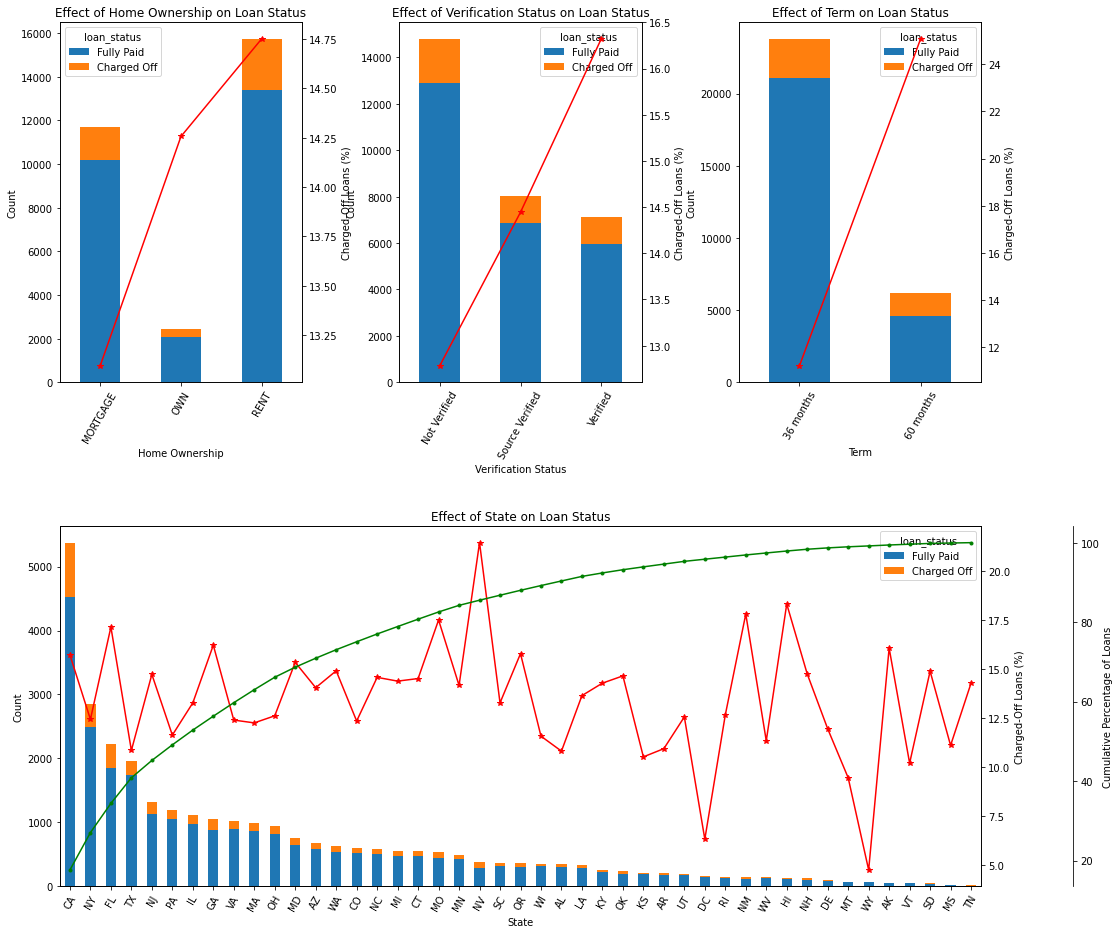

In [64]:
# filter for states more than 10 counts
state_counts = loandf.addr_state.value_counts()
state_counts_index = state_counts[state_counts>10].index.to_list()
df2 =loandf[loandf.addr_state.isin(state_counts_index)]

fig, axs = plt.subplots(2,3, figsize=(16,15))
axs= axs.flatten()
mybarplot(axs[0], loandf[loandf.home_ownership!='OTHER'], col='home_ownership',xlabel='Home Ownership', title='Effect of Home Ownership on Loan Status')
mybarplot(axs[1], loandf, col='verification_status',xlabel='Verification Status', title='Effect of Verification Status on Loan Status')
mybarplot(axs[2], loandf, col='term',xlabel='Term', title='Effect of Term on Loan Status')
ax=plt.subplot(212)
f = np.vectorize(lambda x: state_counts_index.index(x))
ct = mybarplot(ax, df2, col='addr_state',xlabel='State', title='Effect of State on Loan Status', sortfunc=f)

ct['sum_state'] = ct.apply(lambda row: row.sum(), axis=1)
ct['sum_state%'] = ct['sum_state']/ct['sum_state'].sum() *100
ct['cum_sum_state%'] = ct['sum_state%'].cumsum()
#print(ct)
ax2 =ax.twinx()
ax2.spines.right.set_position(('axes',1.1))
ct['cum_sum_state%'].plot(ax=ax2, rot=60, color='g', marker='.')
ax2.set_ylabel('Cumulative Percentage of Loans')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.4)

<font color="green">**Insights**</font>
1. People who own homes are less likely to default compared to who say on rent.
2. Verfied people have higher chance for default.
3. Loans for 60 months are much more likely to default than ones with 36 months duration.
4. 80% of loans come from 16 states. Lonas from state NV seems to have higher probability of default.

In [65]:
#Function to convert data to bins and do count plot.
def mydataplot(ax, df, col ,xlabel=None, title=None, num=11, precision=0):
    start = df[col].min()
    stop = df[col].max()
    bins = np.linspace(start, stop, num, endpoint=True)
    labels = np.round(bins[1:], precision)
    new_col = f'{col}_binned'
    df[new_col] = pd.cut(df[col], bins, labels=labels)
    mybarplot(ax, df, new_col, xlabel, title)

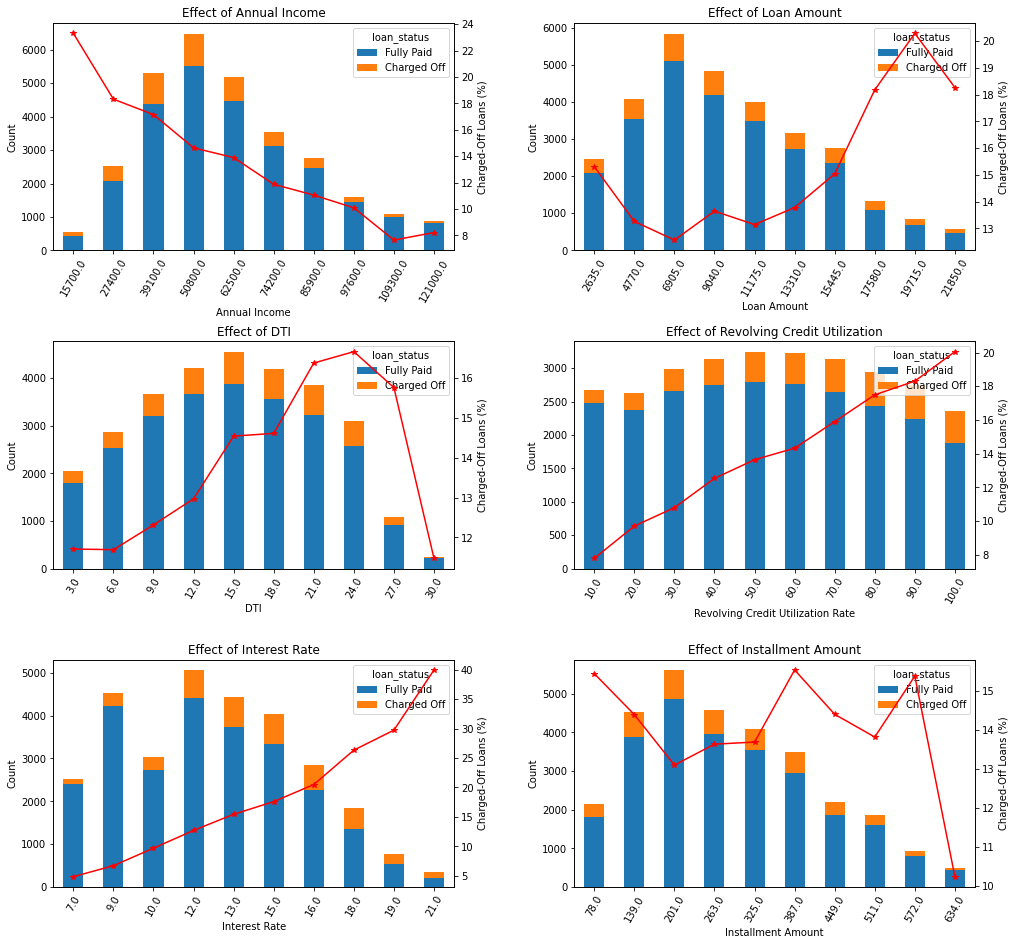

In [66]:
fig, axs = plt.subplots(3,2, figsize=(16,15))
axs= axs.flatten()
mydataplot(axs[0], loandf, 'annual_inc', xlabel='Annual Income', title='Effect of Annual Income')
mydataplot(axs[1], loandf, 'loan_amnt', xlabel='Loan Amount', title='Effect of Loan Amount')
mydataplot(axs[2], loandf, 'dti', xlabel='DTI', title='Effect of DTI')
mydataplot(axs[3], loandf, 'revol_util', xlabel='Revolving Credit Utilization Rate', title='Effect of Revolving Credit Utilization')
mydataplot(axs[4], loandf, 'int_rate', xlabel='Interest Rate', title='Effect of Interest Rate')
mydataplot(axs[5], loandf, 'installment', xlabel='Installment Amount', title='Effect of Installment Amount')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.3)

<font color="green">**Insights**</font>
1. People with higher average income are less likely to default.
2. People who take higher loan amount are more likely to default.
3. People with higher DTI are more likely to default.
4. People who use more revolving credit are more likely to default. It is a strong indicator of default.
5. Loans with higher interest rate are likelt to default.
6. The trend is not clear for installment amount.

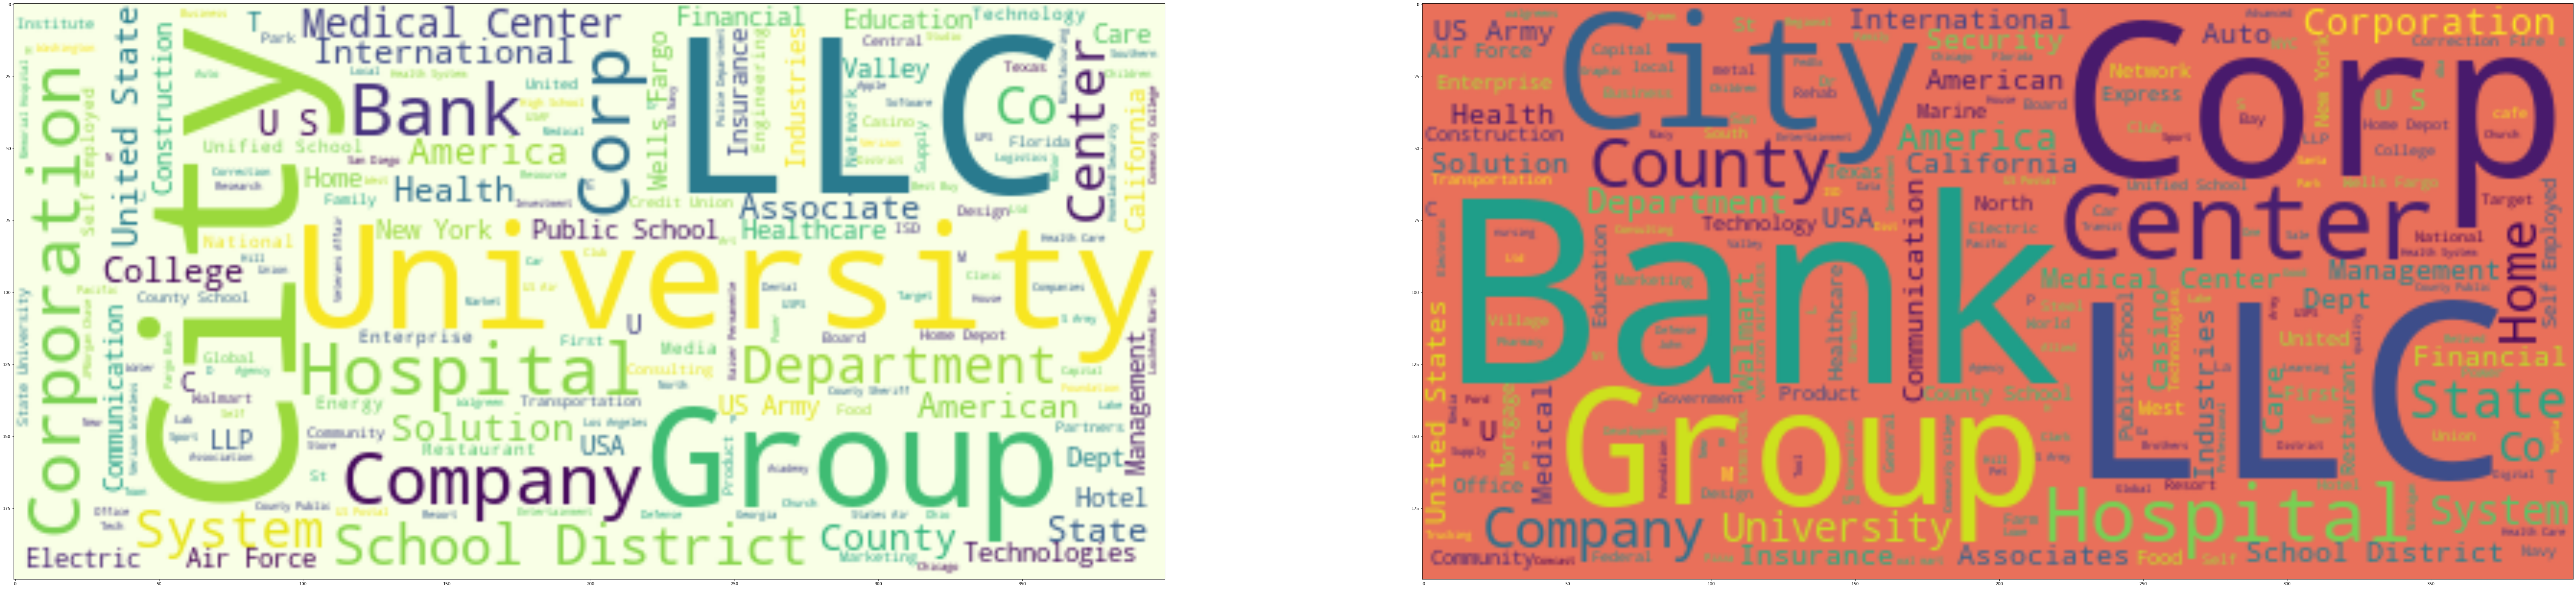

In [112]:
stop_words = ["Unknown", "Inc", "Service",'Services'] + list(STOPWORDS)
text2 = loandf[loandf['loan_status']=='Charged Off']['emp_title']
text1 = loandf[~(loandf['loan_status']=='Charged Off')]['emp_title']
fig,axs = plt.subplots(1,2, figsize=(100,20), layout='tight')
wordcloud = WordCloud(stopwords=stop_words, background_color="#f9ffe6").generate(' '.join(text1))
wordcloud2 = WordCloud(stopwords=stop_words, background_color="#e9705a").generate(' '.join(text2))
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[1].imshow(wordcloud2, interpolation='bilinear')

*People employed by Banks seem to default more.*

### 6.3 Bivariate Analysis

We use a heat plot to get the correlation amoung different coulmns.

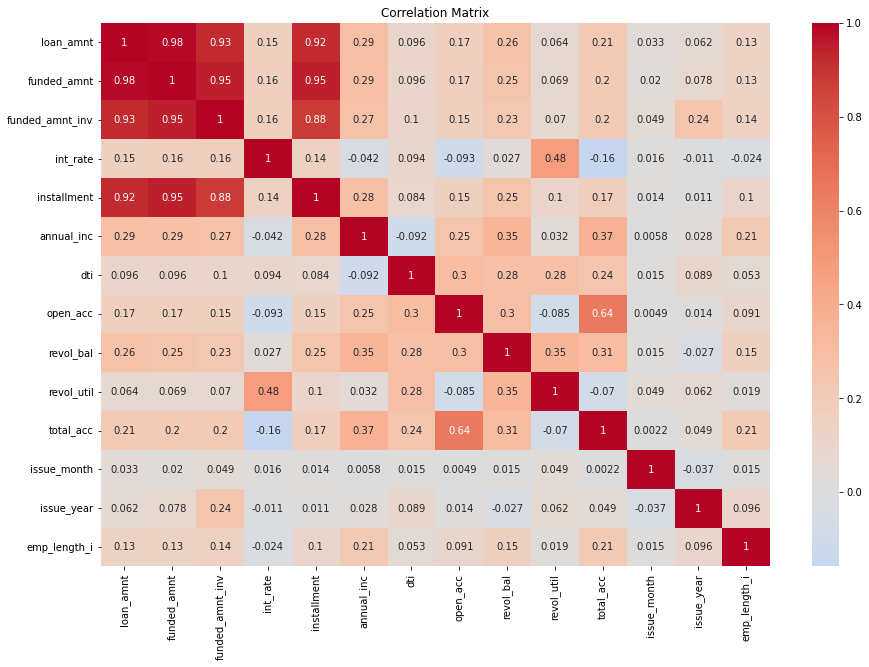

In [68]:
corrdf = loandf[loandf.columns[2:]].corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrdf, 
            xticklabels=corrdf.columns.values,
            yticklabels=corrdf.columns.values,
            annot=True, center=0, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() 

<font color="green">**Insights**</font>
1. Loan amount, funded amount funded amount by investor shows a high level of correlation as expected.
2. Installment amount has good correlation with loan amount.
3. interest rate is correlated with revol_util.


C:\Program Files\Python310\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Program Files\Python310\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


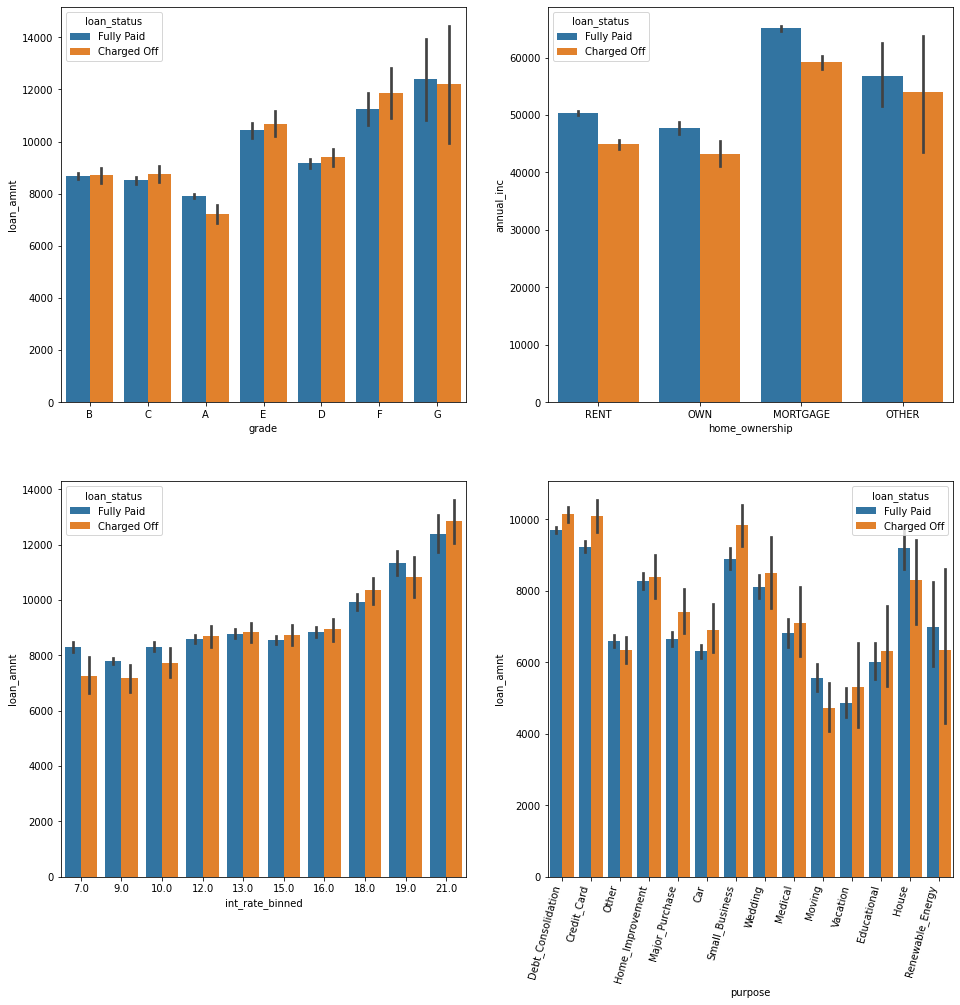

In [114]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
axs = axs.flatten()
order=loandf['purpose'].value_counts().index

sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loandf, ax=axs[0])
sns.barplot(x='home_ownership', y='annual_inc', hue='loan_status', data=loandf, ax=axs[1])

sns.barplot( x='int_rate_binned', y='loan_amnt', hue='loan_status', data=loandf, ax=axs[2])
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=loandf, order=order, ax=axs[3])
_=axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=75, ha='right')

The results of the above plots are inconclusive

## 8 Conclusion


EDA was done on the given data set and results are plotted above.<br><br>
<font color="green">**Recommendations**</font>
 <br>
1. Issuing loans for the purpose of **Weddings,major purchase, car and credit card** is recommended. Exercise caution where the purpose is **Small Business** as the percentage of a loan being charged off is high **25%**. <br>
2. The **loan amount** ranges between 5000 and 12000 is recommended as chances of the the loan getting charged off is very less.  Higher the loan amount, the higher the chances of loan being charged off. <br> 
3. Issuing loans to Applicants whose annual income is **greater than 100000** is recommended as their probablity of charge off is minimum. <br>
4. Issuing loans to applicants whose DTI is  **less than 12%** as their probablity of charge off is minimum.<br>
5. Issuing Loans of higher interest rate has more chances of default.
5. Issuing  loans of high grade like  **A and B** is recommended. Excersie extreme cautioun of low grades loans **E,F and G**.
6. Issuing loans to house owners are recommended.
7. Busiiness of Lending Club is expanding.  <br>
8. Issuing more short term loans of **36 months** as the % of charged off loans is recommended. <br>